In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.1


In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [12]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128,activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0651 - val_accuracy: 0.9816
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.0680 - val_accuracy: 0.9807
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9879 - val_loss: 0.0697 - val_accuracy: 0.9799
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9879 - val_loss: 0.0757 - val_accuracy: 0.9811
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0699 - val_accuracy: 0.9802
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.0759 - val_accuracy: 0.9805
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9896 - val_loss: 0.0718 - val_accuracy:

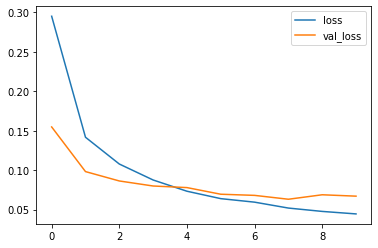

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

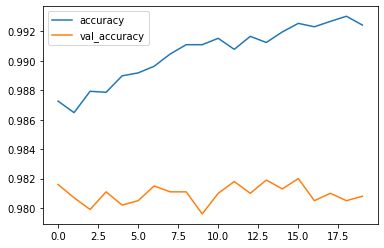

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [18]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9808
[0.08883725106716156, 0.9807999730110168]


Confusion matrix, without normalization
[[ 972    1    1    1    1    0    1    1    2    0]
 [   0 1125    4    1    0    0    2    1    2    0]
 [   3    0 1013    3    1    0    3    5    4    0]
 [   0    0    5  987    0    3    0    6    4    5]
 [   0    1    3    0  946    0    5    5    2   20]
 [   2    0    0    7    1  871    1    3    4    3]
 [   6    2    0    1    2    6  939    0    2    0]
 [   1    4    5    3    0    0    0 1007    2    6]
 [   0    0    1    3    2    1    1    5  956    5]
 [   1    3    0    2    2    2    1    4    2  992]]


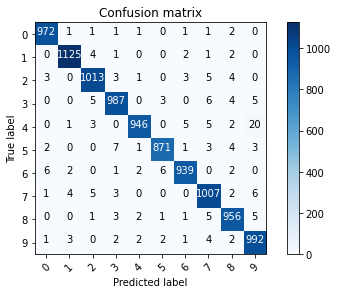

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

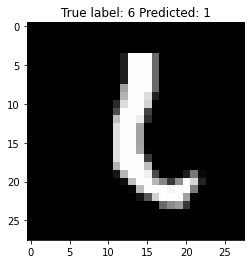

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));